### Import Package

In [5]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

### Read Image

In [6]:
trucka = io.imread("./trucka.bmp").astype("float")
truckb = io.imread("./truckb.bmp").astype("float")

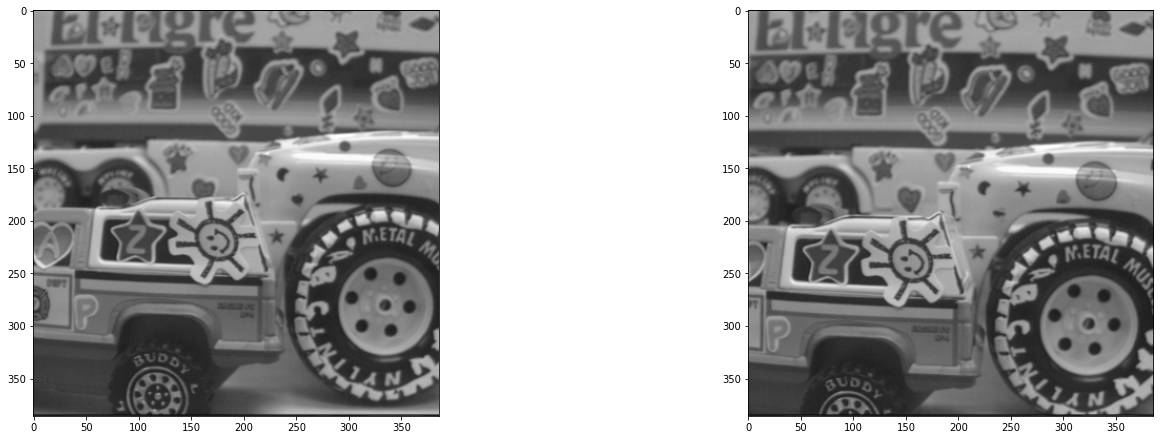

In [9]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.imshow(trucka, cmap="gray") # cmap: 顏色圖譜（colormap), 默認繪製為RGB(A)顏色空間
plt.subplot(2,2,2)
plt.imshow(truckb, cmap="gray")
plt.tight_layout()
plt.show()

### Algorithm

In [150]:
def get_block_position(img, windowsize_r=8, windowsize_c=8, stride=8):
    patch_list = []
    position_tup = []
    # Crop out the window 
    for r in range(0,img.shape[0] - windowsize_r, stride): #從上到下
        for c in range(0,img.shape[1] - windowsize_c, stride): #從左到右
            position_tup.append((r,c))
            window = img[r:r+windowsize_r,c:c+windowsize_c]
            patch_list.append(window)
    return patch_list, position_tup

def get_motion_and_position(patch_list_a, position_tup_a, patch_list_b, position_tup_b, search_range=50):
    motion_tup = []
    for patch_a, position_a in zip(patch_list_a, position_tup_a):
        cost = 999999
        for patch_b, position_b in zip(patch_list_b, position_tup_b):
            # 計算目前 window_a 到 window_b 的距離
            position_distance = ((position_a[0]-position_b[0])**2 + (position_a[1]-position_b[1])**2)**0.5
            if position_distance<=search_range:
                # 計算兩 window 的差異
                difference = np.sum(abs(patch_a-patch_b))
                # 找出產生最小 cost 的位置 
                if difference <= cost:
                    cost = difference
                    match_position = position_b
                    
        dr, dc = match_position[0]-position_a[0], match_position[1] - position_a[1]
        motion_tup.append((position_a, (dr, dc)))
    return motion_tup

### Parameter

In [151]:
window = 31
search_range = 50

### 將圖片分成好幾堆

In [152]:
patch_list_a, position_tup_a = get_block_position(trucka, window, window, stride=window)
patch_list_b, position_tup_b = get_block_position(truckb, window, window, stride=1)

In [153]:
motion_tup = get_motion_and_position(patch_list_a, position_tup_a, patch_list_b, position_tup_b, search_range)

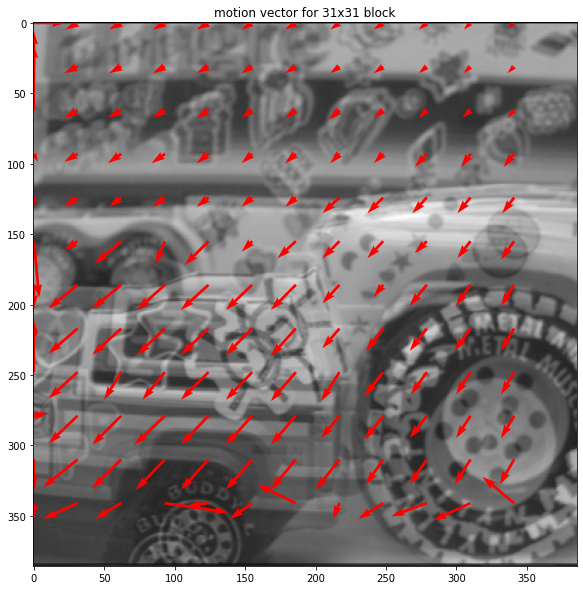

In [154]:
# 注意row,col的順序!!!(row=y,col=x)
X = [t[0][1] for t in motion_tup] # 箭頭位置的x座標
Y = [t[0][0] for t in motion_tup] # 箭頭位置的y座標
U = [t[1][1] for t in motion_tup] # 箭頭向量的x分量
V = [-t[1][0] for t in motion_tup] # 箭頭向量的y分量

plt.figure(figsize=(10,10))
plt.imshow(0.5*trucka+0.5*truckb, cmap="gray")
plt.quiver(X, Y, U, V,color='r')
plt.title("motion vector for {}x{} block".format(block,block))

# plt.gca().invert_yaxis()
# plt.axis('off')

plt.savefig("./output/block_{}_motion_vector.png".format(str(block)),  transparent=False)
plt.show()

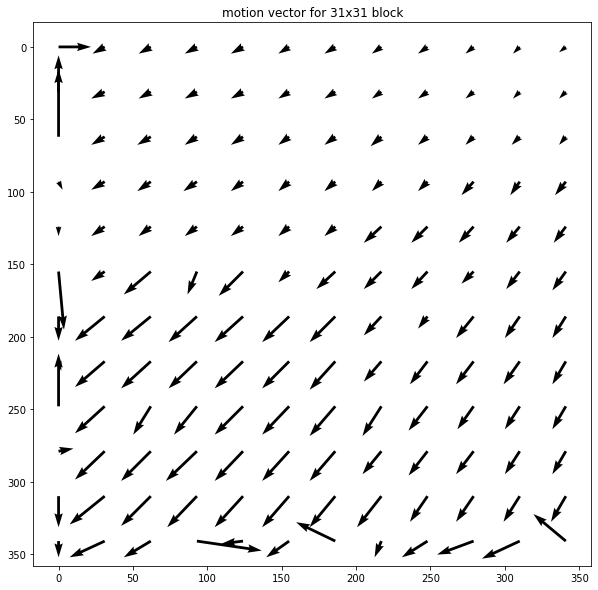

In [155]:
plt.figure(figsize=(10,10))
plt.quiver(X, Y, U, V)
plt.title("motion vector for {}x{} block".format(block,block))
plt.gca().invert_yaxis()

plt.savefig("./output/block_{}_motion_vector.png".format(str(block)),  transparent=False)
plt.show()

### Use trucka.bmp as the basis, sample it by an 9×9 , 11×11, 15×15, 21×21, 31×31 block.

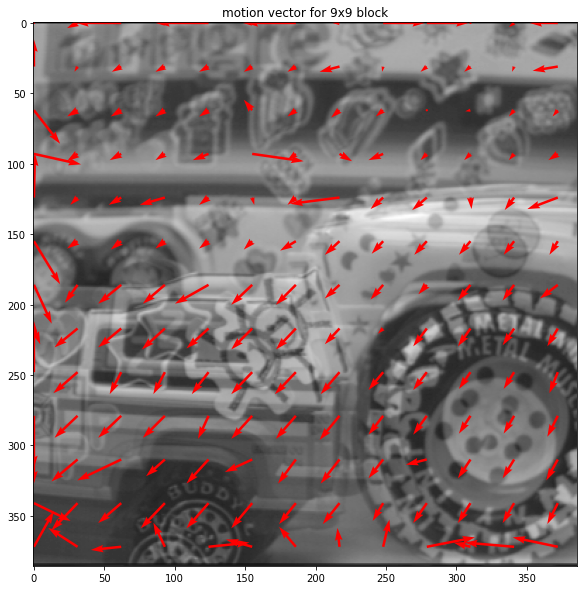

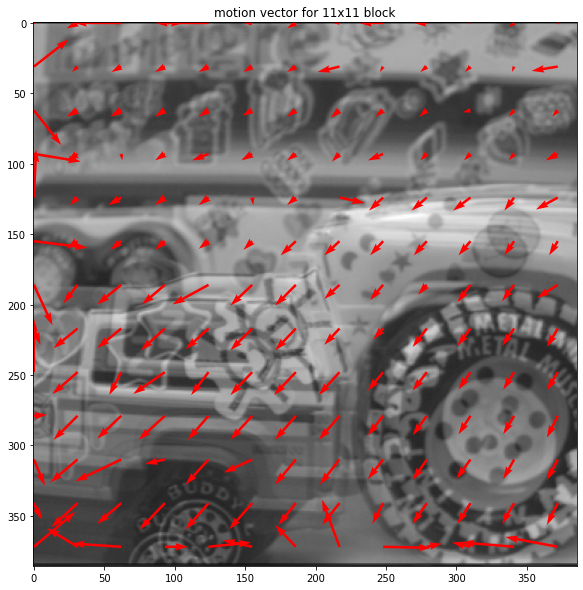

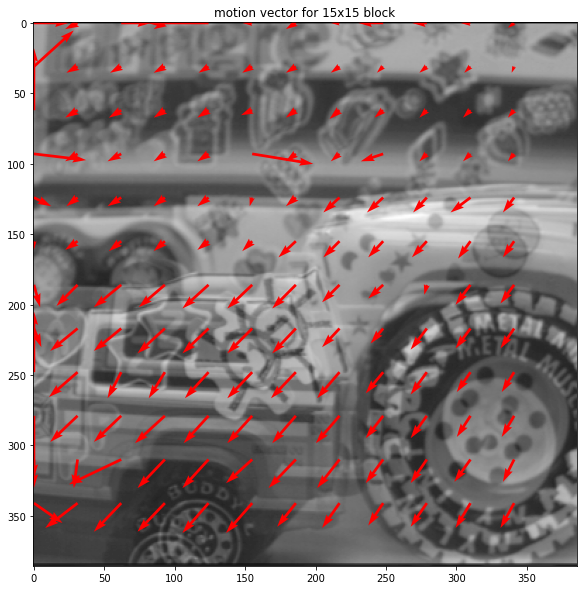

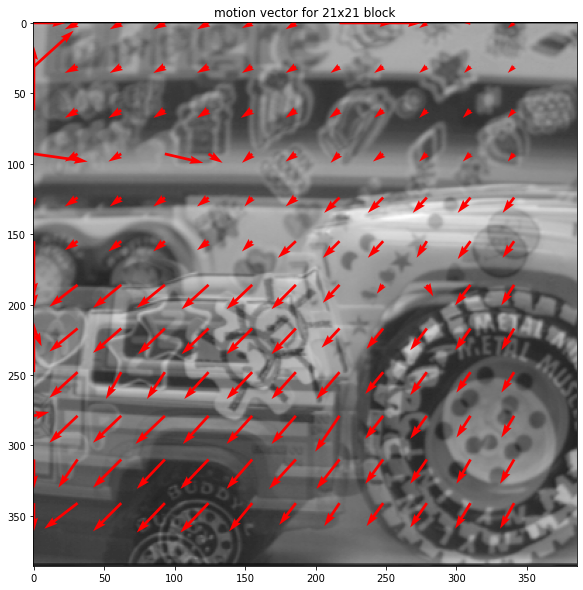

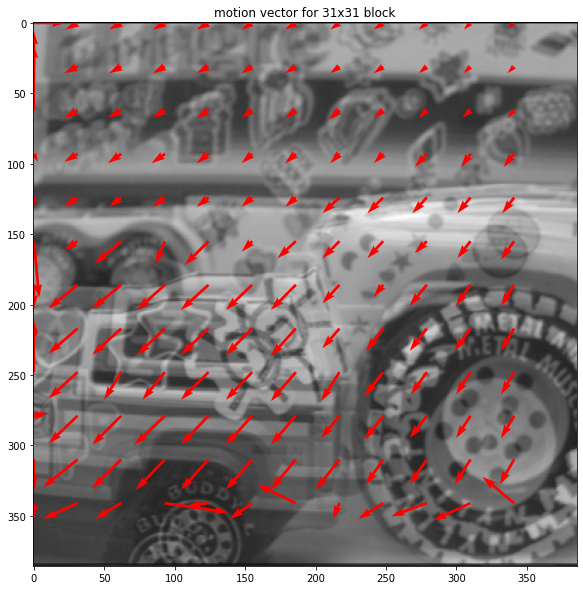

In [156]:
blocks=[9,11,15,21,31]
search_range = 50

for block in blocks:
    patch_list_a, position_tup_a = get_block_position(trucka, block, block, stride=window)
    patch_list_b, position_tup_b = get_block_position(truckb, block, block, stride=1)
    motion_tup = get_motion_and_position(patch_list_a, position_tup_a, patch_list_b, position_tup_b, search_range)
    
    # 注意row,col的順序!!!(row=y,col=x)
    X = [t[0][1] for t in motion_tup] # 箭頭位置的x座標
    Y = [t[0][0] for t in motion_tup] # 箭頭位置的y座標
    U = [t[1][1] for t in motion_tup] # 箭頭向量的x分量
    V = [-t[1][0] for t in motion_tup] # 箭頭向量的y分量

    plt.figure(figsize=(10,10))
    plt.imshow(0.5*trucka+0.5*truckb, cmap="gray")
    plt.quiver(X, Y, U, V,color='r')
    plt.title("motion vector for {}x{} block".format(block,block))

    # plt.gca().invert_yaxis()
    # plt.axis('off')

    plt.savefig("./output/block_{}_motion_vector.png".format(str(block)),  transparent=False)
    plt.show()